In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Physical constants
planck = 6.62607015*10**(-34) #J*s
c_light = 2.99792458*10**8 #m/s
nm_m = 10**(-9)
ev_J = 1.602176634*10**(-19) #J per eV

## Default values from http://gaussian.com/uvvisplot/
## Standard deviation (related to band width) is sigma (stdev) 
## Default 0.4 eV = 1/3099.6 nm^-1 = 0.00032262
## Default 0.4 eV = 10E7/3099.6 cm^-1 = 3226.2 cm^-1
const = 1.3062974*10**8
sigma_nm = 1/3099.6
sigma_cm = 10**7/3099.6

def spect_func(x, each_os, each_lambda, const,sigma_cm,sigma_nm):
    #6 variables to this function a,b,c,d,e,f to give us a y value
    return const*(each_os/sigma_cm)*np.exp(-(((1/x)-(1/each_lambda))/sigma_nm)**2)
    #this returns the y value (what the equation itself is equal to)
def convert_ev_nm(x):
    return planck*c_light/(nm_m*ev_J*x)
def shift_ev(x):
    return x - 0.6

In [5]:
data = np.array([
    [188.40,0.2563],
    [170.63,0.0035],
    [168.30,0.0418],
    [158.18,0.0036],
    [152.06,0.0039],
    [150.19,0.0047],
    [147.05,0.0943],
    [146.76,0.3266],
    [143.16,0.0183],
    [137.73,0.0225],
    [136.72,0.2449],
    [135.47,0.0071],
    [135.13,0.0018],
    [132.61,0.0073],
    [132.40,0.0201],
        ]) 

fig = plt.figure()


<Figure size 432x288 with 0 Axes>

207.30015840948778
185.987636268597
183.2227336005674
171.29215113311434
164.13842058046419
161.96167281690845
158.31613970375253
157.9800519330811
153.81636652578536
147.56554489450716
146.40674928681904
144.97427486613807
144.58496260510364
141.70373925038587
141.4639762272164
Max peak energy (eV) for overall spectrum =  7.88751
Max peak wavelength (nm) for overall spectrum =  157.19064

Wavelength and exctinction coefficient corresponding to peak maximum, plus surrounding data points:
[[  156.18729097 18982.59728637]
 [  157.19063545 19088.74603528]
 [  158.19397993 18809.2103329 ]]


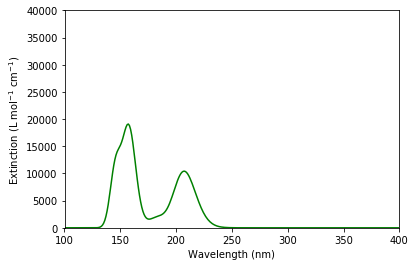

In [6]:
## Calculate the maximum peak according to http://gaussian.com/uvvisplot/
#intializing 
x_axis = np.linspace(100,400,300)
#print(x_axis)
spectrum = np.zeros(len(x_axis))
#print("This is spectrum", spectrum)
for i in data:
    j = convert_ev_nm(i[0])
    #print("this is j", j)
    shift = shift_ev(j)
    #print("this is shift", shift)
    nj = convert_ev_nm(shift)
    #print("this is nj", nj) 
    spectrum_indiv = np.zeros(len(x_axis))
    ## uncomment line below if want shift
    spectrum_indiv += np.array(spect_func(x_axis, i[1], nj, const,sigma_cm,sigma_nm))
    ## comment line below if need shift
    #spectrum_indiv += np.array(spect_func(x_axis, i[1], i[0], const,sigma_cm,sigma_nm))
    #print("this is spectrum_indiv", spectrum_indiv)    #print("this is i", i[0])
    #print("this is i[1]", i[1])
       ## Comment the line below if you don't want to plot the spectrum
    #plt.plot(x_axis,spectrum_indiv)
    print(nj)
    spectrum += spectrum_indiv
    #print(spectrum)

## Comment the line below if you don't want to plot the spectrum
plt.plot(x_axis,spectrum,color='green')
#plt.plot(x_axis,spect_func(x_axis, data[0,2], data[0,1], const,sigma_cm,sigma_nm))

## Determine the wavelength with maximum absorption and select the surrounding data points (+/- 1) in the spectrum
spectrum_max = np.amax(spectrum)
spect_max_index = np.argmax(spectrum)
spect_max_array = np.array([
       [x_axis[spect_max_index-1],spectrum[spect_max_index-1]],
       [x_axis[spect_max_index],spectrum[spect_max_index]],
       [x_axis[spect_max_index+1],spectrum[spect_max_index+1]]
               ])

print("Max peak energy (eV) for overall spectrum = ", '{:1.5f}'.format(convert_ev_nm(x_axis[spect_max_index])))
print("Max peak wavelength (nm) for overall spectrum = ", '{:3.5f}'.format(x_axis[spect_max_index]))
print()
print("Wavelength and exctinction coefficient corresponding to peak maximum, plus surrounding data points:")
print(spect_max_array)

## Comment the line below if you don't want to plot the spectrum
plt.xlabel(r"Wavelength (nm)")
plt.ylabel(r"Extinction (L mol$^{-1}$ cm$^{-1}$)")
plt.xlim(100.,400.)
plt.ylim(0.,40000.)
plt.show()

fig.tight_layout()
fig.set_size_inches(6,5)
#fig.savefig('GXL_molecule03_pcm_test0.4ev.png', dpi=600, bbox_inches='tight')

